# Лабораторная работа №6

Стратиенко Илья ИУ10-56, Вариант - 17

## Цель работы

изучение принципов построения модели линейной одномерной регрессии.

## Задачи
 - реализовать конвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
 - получение теоретических представлений о задаче регресии;
 - получение навыков использования пайплайна при решении задачи машинного обучения;
 - получение навыков рефакторинга кода в задачах машинного обучения.
 
## База данных

Automotive Vehicles Engine Health Dataset - https://www.kaggle.com/datasets/parvmodi/automotive-vehicles-engine-health-dataset/data

Набор данных может включать в себя различные функции и измерения, связанные с состоянием двигателя транспортных средств, такие как обороты двигателя, температура, давление и другие данные датчиков. Он также может включать метаданные о транспортном средстве, такие как марка, модель, год и пробег.

Одним из потенциальных проектов с использованием этого набора данных может быть создание модели прогнозируемого технического обслуживания автомобильных двигателей. Анализируя закономерности и тенденции в данных, алгоритмы машинного обучения можно научить прогнозировать, когда двигатель может потребовать обслуживания или ремонта. Это может помочь владельцам транспортных средств и механикам активно решать потенциальные проблемы до того, как они станут более серьезными, что приведет к улучшению характеристик автомобиля и увеличению срока службы двигателя.

Другим потенциальным применением этого набора данных может быть анализ производительности различных типов двигателей и транспортных средств. Исследователи могли бы использовать эти данные, например, для сравнения производительности двигателей разных производителей или для оценки эффективности различных стратегий технического обслуживания. Это может способствовать инновациям и улучшениям в автомобильной промышленности.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./engine_data.csv')
dataset.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [9]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[2.49359182]
 [2.94160593]
 [2.96174558]
 [3.70783474]
 [5.67291858]]
Зависимая переменная
[11.79092738 16.19386556  6.55314691 19.51017166 15.73887141]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

[6.73274111 6.5970349  6.71708124 ... 6.69349723 6.47779954 6.5036157 ]


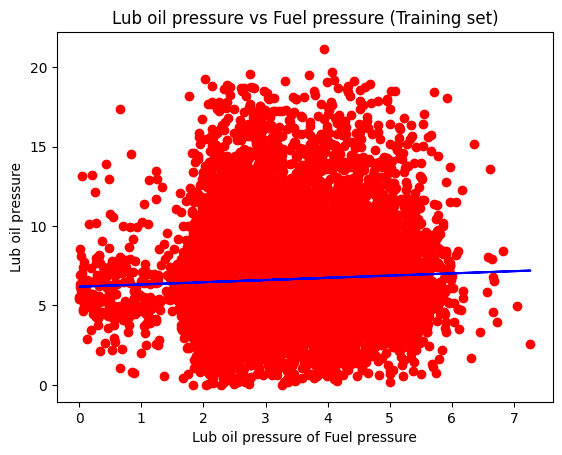

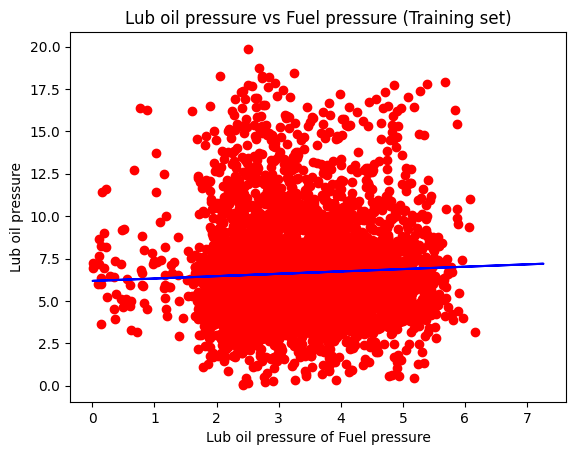

In [13]:
y_pred = regressor.predict(X_test)
print(y_pred)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Lub oil pressure vs Fuel pressure (Training set)')
plt.xlabel('Lub oil pressure of Fuel pressure')
plt.ylabel('Lub oil pressure')
plt.show()

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Lub oil pressure vs Fuel pressure (Training set)')
plt.xlabel('Lub oil pressure of Fuel pressure')
plt.ylabel('Lub oil pressure')
plt.show()

In [14]:
LOP = [[6.25]]

regressor.predict(LOP)

array([7.05373878])

In [15]:
LOP = [[6.25]]

a = regressor.coef_
b = regressor.intercept_

Salary  = a * LOP + b 
Salary

array([[7.05373878]])

## Контрольные вопросы
1)Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?
При использовании линейной модели регрессии, масштабирование признаков не является строго обязательным, и в некоторых случаях модель может хорошо работать и без этого. Это связано с тем, что параметры (веса) модели регрессии просто масштабируются значениями признаков.

2)Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?
Дифференцируемость: Функция потерь должна быть дифференцируемой, чтобы можно было использовать методы оптимизации для обучения модели. Квадратичная функция дифференцируема по весам, что упрощает оптимизацию.

Чувствительность к выбросам: Квадратичное отклонение сильнее штрафует за большие ошибки по сравнению с абсолютным отклонением. Это делает модель более чувствительной к выбросам, что может быть полезным в ситуациях, где большие ошибки требуется учесть с большим весом.

Статистические соображения: Если предположить, что ошибки в данных распределены нормально, то использование MSE может быть связано с максимизацией правдоподобия, что упрощает статистический вывод и оценку доверительных интервалов.

3)Что именно реализовано в методе fit(X, y) класса LinearRegression?
В методе fit(X, y) класса LinearRegression реализован процесс обучения модели линейной регрессии на основе переданных тренировочных данных. Обычно этот метод использует метод наименьших квадратов (Ordinary Least Squares, OLS) для нахождения оптимальных параметров модели, минимизирующих среднеквадратичное отклонение (MSE) между прогнозами модели и фактическими значениями целевой переменной.

4)Поясните назначение метода predict класса LinearRegression.
Метод predict класса LinearRegression в библиотеках машинного обучения, таких как scikit-learn, используется для получения прогнозов (предсказаний) целевых переменных на основе входных данных. После того как модель линейной регрессии обучена с использованием метода fit на тренировочных данных, метод predict используется для генерации прогнозов на новых данных или данных, которые модель ранее не видела.

5)По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?
Оценка точности модели на тестовой подвыборке дает представление о том, насколько хорошо модель справляется с реальными данными и помогает предсказать ее производительность на новых данных в реальных условиях.